In this notebook
1) Get data \
    1.1) Read HDF5 \
    1.2) Select only I channel 
2) Filter with moving average
3) Cut data (discard baseline tale) 
4) Filter data (movinga average)
5) Compute second derivative
6) Get cuspid point on x-axis
7) Select 1/8 of total signal lenght for pre trigger

In [127]:
import h5py
import os
import sys
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT')
from HDF5 import HDF5
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter, find_peaks

In [66]:
def read(parent):
    data = []
    for root, dirs, files in os.walk(parent):
        for file in files:
            if file.endswith('.hdf5'):
                file_path = os.path.join(root, file)
                f = HDF5.HDF5()
                f.name = file_path
                data.append(f.load_hdf5()['Signals']['I'])
    return data


In [99]:
data = read(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\RUNS\1')

Execution time: 0.187
Execution time: 0.189
Execution time: 0.256
Execution time: 0.216
Execution time: 0.196
Execution time: 0.213
Execution time: 0.19
Execution time: 0.188
Execution time: 0.168
Execution time: 0.197


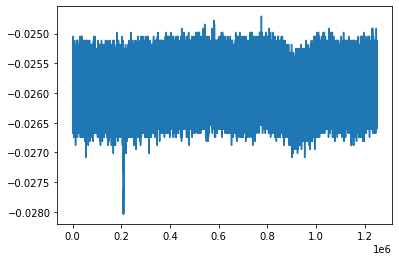

In [100]:
plt.plot(np.linspace(0,len(data[0]),len(data[0])),data[0])

In [117]:
idx = [i for i in range(len(data[0])) if (i<int(0.3*1e6) and i>int(0.15*1e6))]
I = data[0][idx]

In [118]:
# Apply moving average filter
window_size = 100  # Size of the moving average window
cumsum = np.cumsum(I)
cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
moving_avg = cumsum[window_size - 1:] / window_size
# Pad the moving average to match the length of the original signal
moving_avg = np.pad(moving_avg, (window_size - 1, 0), mode='constant', constant_values=(moving_avg[0], moving_avg[-1]))

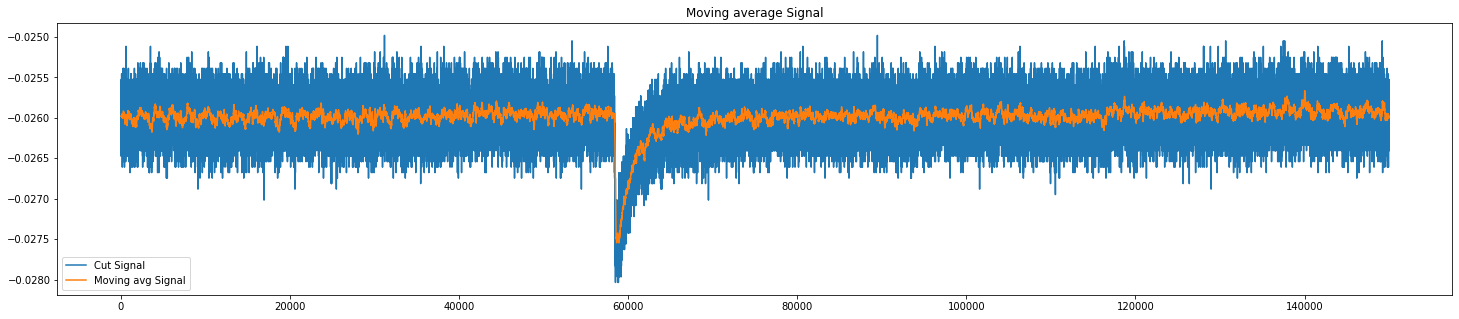

In [142]:
plt.figure(figsize=(25,5))
plt.plot(np.linspace(0,len(I),len(I)), I, label='Cut Signal')
plt.plot(np.linspace(0,len(moving_avg),len(moving_avg)), moving_avg, label='Moving avg Signal')
plt.title('Moving average Signal')
plt.legend()

In [120]:
window = 171
polyorder = 3
sd = savgol_filter(I,window, polyorder, deriv=2)

Text(0.5, 1.0, 'Second Derivative')

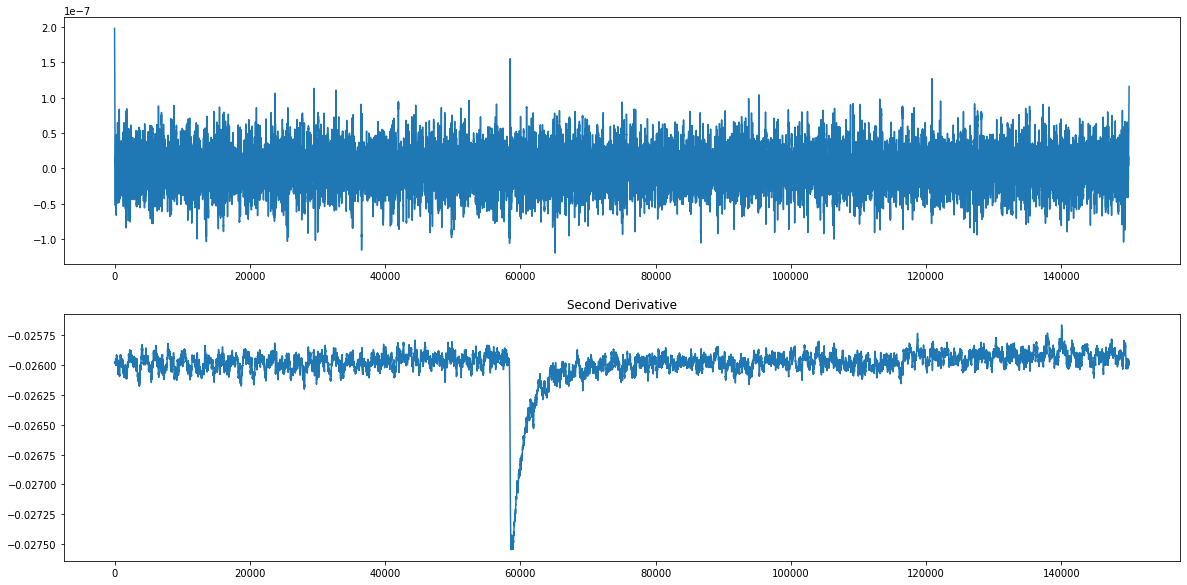

In [121]:
fig, axs = plt.subplots(2,1,figsize=(20,10))
axs[0].plot(np.linspace(0,len(sd),len(sd)),sd)
axs[1].plot(np.linspace(0,len(moving_avg),len(moving_avg)), moving_avg, label='Moving avg Signal')
plt.title('Second Derivative')

Text(0.5, 0.98, 'Second Derivative Threshold')

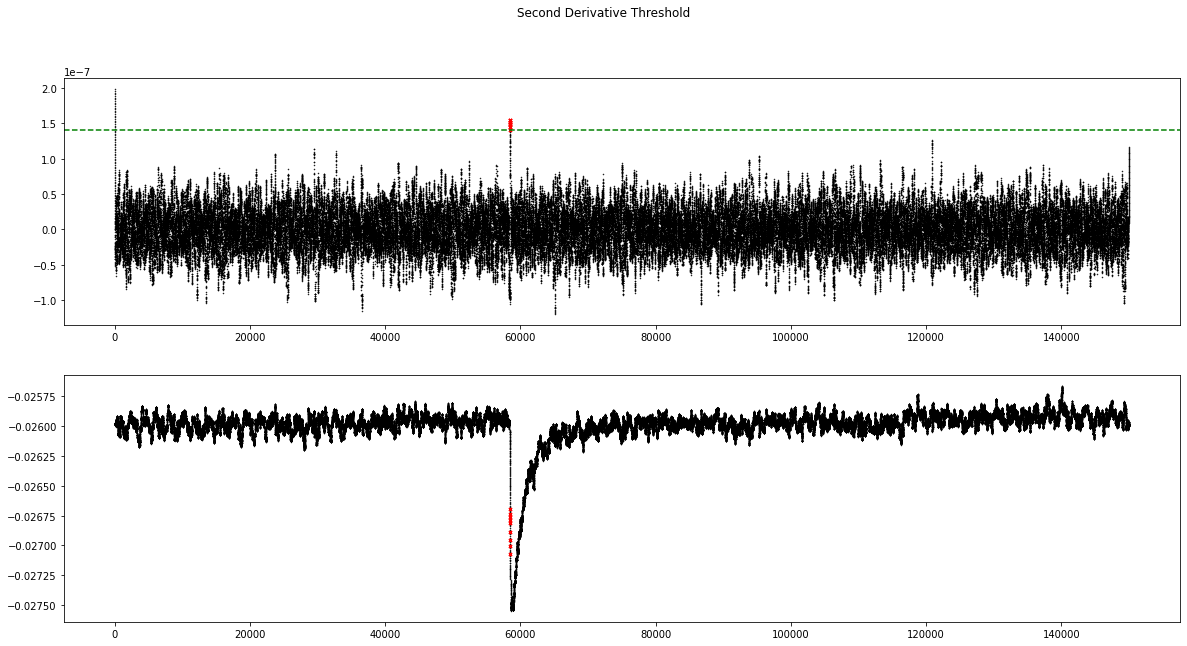

In [150]:
th = 1.4*1e-7
peaks, props = find_peaks(sd, th)
fig, axs = plt.subplots(2,1,figsize=(20,10))
axs[0].scatter(np.linspace(0,len(sd),len(sd)),sd,marker='.',color='black',s=1)
axs[1].scatter(np.linspace(0,len(moving_avg),len(moving_avg)), moving_avg, label='Moving avg Signal',marker='.',color='black',s=1)
axs[0].scatter(peaks, props['peak_heights'], marker='x', color='red', s=10)
axs[1].scatter(peaks, moving_avg[peaks], marker='x', color='red', s=10)
axs[0].axhline(th, 0, 1, linestyle='--', color='green')
fig.suptitle('Second Derivative Threshold')

(57500.0, 60000.0)

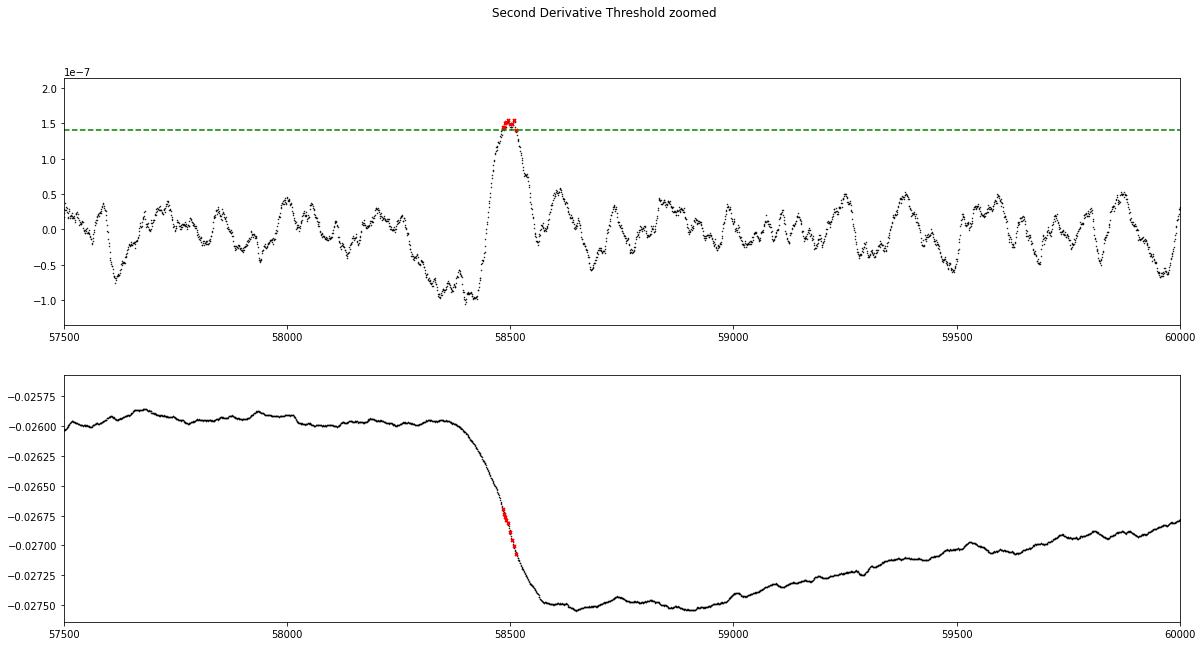

In [149]:
th = 1.4*1e-7
peaks, props = find_peaks(sd, th)
fig, axs = plt.subplots(2,1,figsize=(20,10))
axs[0].scatter(np.linspace(0,len(sd),len(sd)),sd,marker='.',color='black',s=1)
axs[1].scatter(np.linspace(0,len(moving_avg),len(moving_avg)), moving_avg, label='Moving avg Signal',marker='.',color='black',s=1)
axs[0].scatter(peaks, props['peak_heights'], marker='x', color='red', s=10)
axs[1].scatter(peaks, moving_avg[peaks], marker='x', color='red', s=10)
axs[0].axhline(th, 0, 1, linestyle='--', color='green')
fig.suptitle('Second Derivative Threshold zoomed')
axs[0].set_xlim([5.75*1e4,6*1e4])
axs[1].set_xlim([5.75*1e4,6*1e4])